In [ ]:
# Implement Naive Bayes classifier using a CSV training dataset and compute accuracy using test data for Disease Prediction.



In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('tennis.csv')
data.head(10)


,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Overcast,Mild,Normal,Strong,Yes
1,D2,Sunny,Mild,Normal,Strong,Yes
2,D3,NaN,Mild,High,Strong,No
3,D4,Sunny,Mild,High,Weak,Yes
4,D5,Sunny,Cool,Normal,Strong,Yes
5,D6,NaN,Cool,Normal,Strong,Yes
6,D7,Sunny,Mild,High,Weak,Yes
7,D8,Sunny,Mild,Normal,Weak,Yes
8,D9,Rainy,Mild,Normal,Weak,No
9,D10,Rainy,Cool,High,Weak,No


In [155]:
from sklearn.preprocessing import LabelEncoder

encorder = LabelEncoder()

for column in data.columns:
    data[column] = encorder.fit_transform(data[column])

data.head(10)

,Day,Outlook,Temperature,Humidity,Wind,Play
0,0,0,2,1,0,1
1,11,2,2,1,0,1
2,22,3,2,0,0,0
3,25,2,2,0,1,1
4,26,2,0,1,0,1
5,27,3,0,1,0,1
6,28,2,2,0,1,1
7,29,2,2,1,1,1
8,30,1,2,1,1,0
9,1,1,0,0,1,0


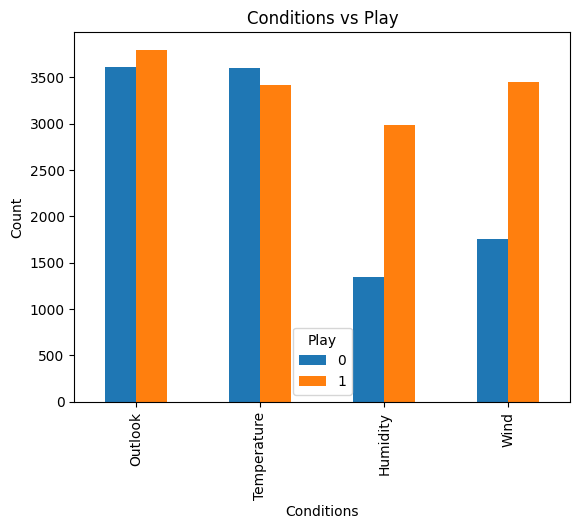

In [156]:
conditions = ['Outlook', 'Temperature','Humidity','Wind']

data.groupby('Play')[conditions].sum().T.plot(kind='bar')
plt.title("Conditions vs Play")
plt.xlabel("Conditions")
plt.ylabel("Count")
plt.show()


In [158]:
X = data.drop("Play", axis=1)
Y = data["Play"]

print("Features:\n", X.head(10))
print("\nTarget:\n", Y.head(10))

Features:
    Day  Outlook  Temperature  Humidity  Wind
0    0        0            2         1     0
1   11        2            2         1     0
2   22        3            2         0     0
3   25        2            2         0     1
4   26        2            0         1     0
5   27        3            0         1     0
6   28        2            2         0     1
7   29        2            2         1     1
8   30        1            2         1     1
9    1        1            0         0     1

Target:
 0    1
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: Play, dtype: int64


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print("X_train with random_state = 0")
print(X_train.head(10))

X_train with random_state = 0
      Day  Outlook  Temperature  Humidity  Wind
2201    1        1            2         1     1
5598   23        3            2         0     0
5199   19        3            1         0     1
939    20        2            2         1     1
847    19        1            2         1     1
1442    4        1            0         0     0
333    21        1            2         1     1
5158    5        0            0         1     0
690    13        0            1         1     1
4424    2        0            0         1     2


In [176]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, Y_train)


BernoulliNB()

In [177]:
Y_pred = model.predict(X_test)

print("Predicted:", Y_pred[:10])
print("Actual   :", Y_test.values[:10])

Predicted: [1 1 0 0 0 0 1 1 1 0]
Actual   : [1 1 1 1 1 0 1 1 1 0]


In [180]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of Naive Bayes Classifier:", f"{accuracy * 100:.4f} %")

Accuracy of Naive Bayes Classifier: 79.7241 %
